In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [2]:
data = pd.read_csv("kaggle_data/heart.xls")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
for col in data.columns:
    print(data[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Age
54    5.6%
58    4.6%
55    4.5%
56    4.1%
57    4.1%
52    3.9%
51    3.8%
59    3.8%
62    3.8%
53    3.6%
60    3.5%
48    3.4%
61    3.4%
63    3.3%
50    2.7%
46    2.6%
41    2.6%
43    2.6%
64    2.4%
65    2.3%
49    2.3%
47    2.1%
44    2.1%
42    2.0%
45    2.0%
38    1.7%
67    1.6%
39    1.6%
66    1.4%
69    1.4%
40    1.4%
35    1.2%
37    1.2%
68    1.1%
34    0.8%
74    0.8%
70    0.8%
36    0.7%
71    0.5%
32    0.5%
72    0.4%
29    0.3%
75    0.3%
33    0.2%
77    0.2%
76    0.2%
31    0.2%
30    0.1%
28    0.1%
73    0.1%
Name: proportion, dtype: object
Sex
M    79.0%
F    21.0%
Name: proportion, dtype: object
ChestPainType
ASY    54.0%
NAP    22.1%
ATA    18.8%
TA      5.0%
Name: proportion, dtype: object
RestingBP
120    14.4%
130    12.9%
140    11.7%
110     6.3%
150     6.0%
       ...  
185     0.1%
98      0.1%
92      0.1%
113     0.1%
164     0.1%
Name: proportion, Length: 67, dtype: object
Cholesterol
0      18.7%
254     1.2%
223     1.1%
220     1.

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


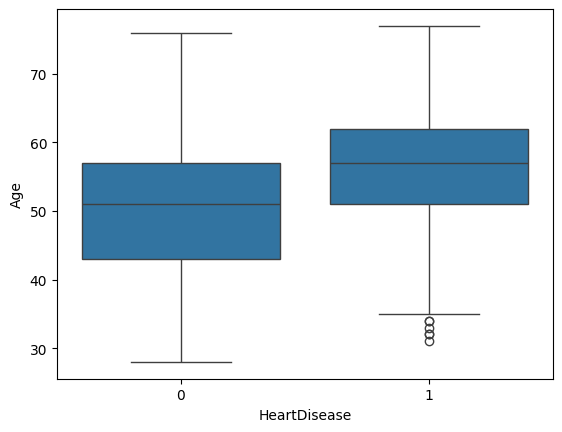

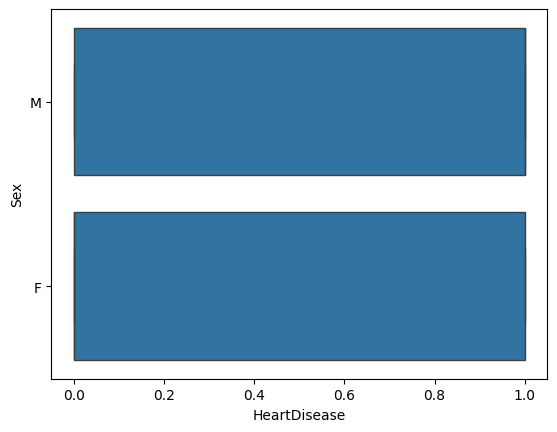

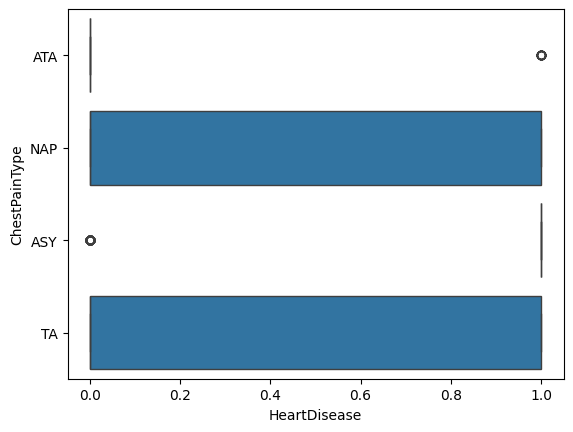

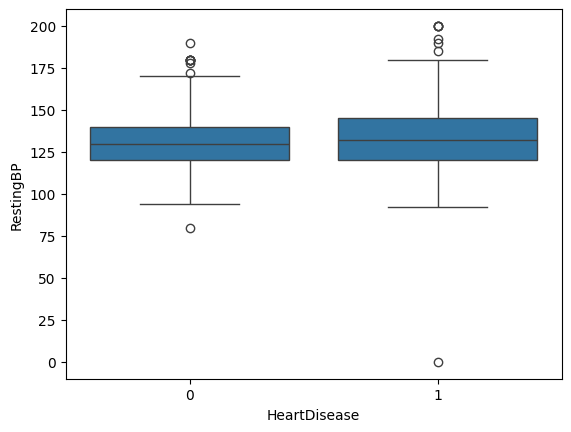

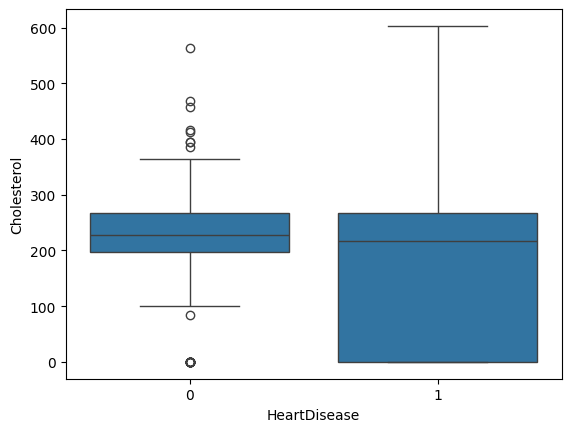

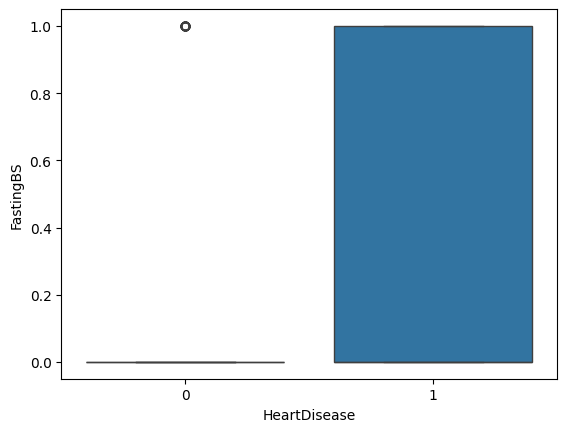

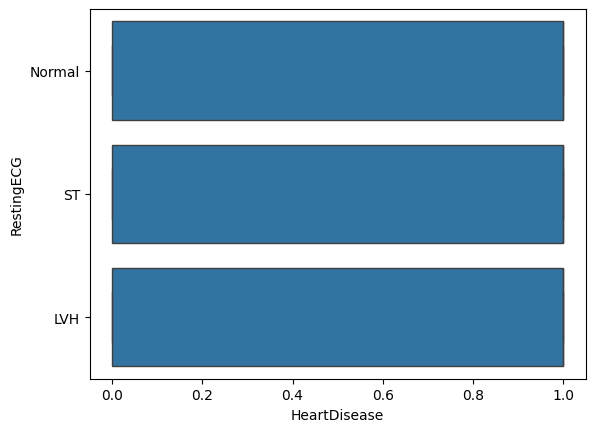

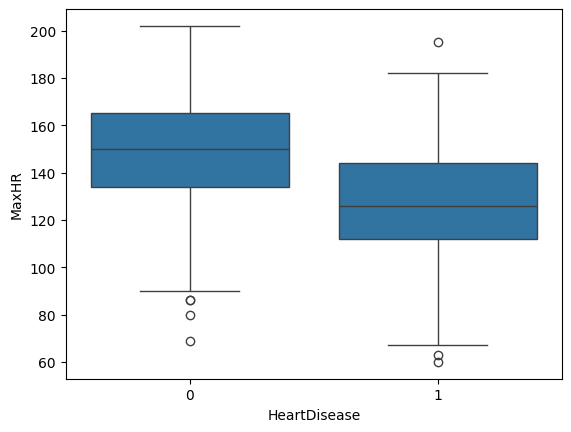

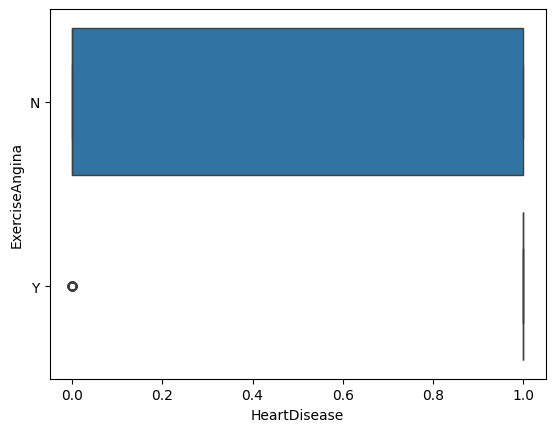

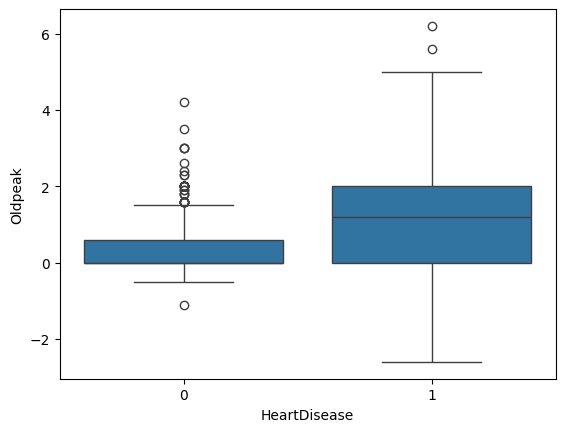

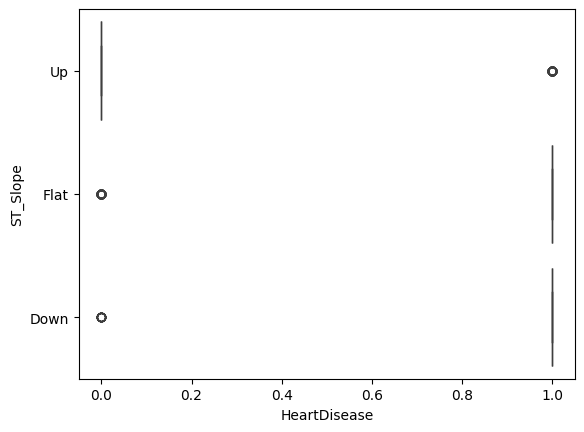

In [8]:
for col in data.columns:
    if col != 'HeartDisease':
        sns.boxplot(x='HeartDisease', y=col, data=data)
        plt.show()

In [9]:
numerical_cols = data.select_dtypes(exclude='object')

In [10]:
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = data[col].median()

    data[col] = np.where(data[col] < lower_bound, median, data[col])
    data[col] = np.where(data[col] > upper_bound, median, data[col])

In [11]:
categorical_cols = data.select_dtypes(include='object')

for col in categorical_cols:
    print(data[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Sex
M    79.0%
F    21.0%
Name: proportion, dtype: object
ChestPainType
ASY    54.0%
NAP    22.1%
ATA    18.8%
TA      5.0%
Name: proportion, dtype: object
RestingECG
Normal    60.1%
LVH       20.5%
ST        19.4%
Name: proportion, dtype: object
ExerciseAngina
N    59.6%
Y    40.4%
Name: proportion, dtype: object
ST_Slope
Flat    50.1%
Up      43.0%
Down     6.9%
Name: proportion, dtype: object


In [12]:
for col in categorical_cols:
    data = pd.get_dummies(data, columns=[col], drop_first=True, dtype=int)

data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40.0,140.0,289.0,0.0,172.0,0.0,0.0,1,1,0,0,1,0,0,0,1
1,49.0,160.0,180.0,0.0,156.0,1.0,1.0,0,0,1,0,1,0,0,1,0
2,37.0,130.0,283.0,0.0,98.0,0.0,0.0,1,1,0,0,0,1,0,0,1
3,48.0,138.0,214.0,0.0,108.0,1.5,1.0,0,0,0,0,1,0,1,1,0
4,54.0,150.0,195.0,0.0,122.0,0.0,0.0,1,0,1,0,1,0,0,0,1


In [19]:
data['FastingBS'].value_counts()

FastingBS
0.0    918
Name: count, dtype: int64

In [20]:
data = data.drop('FastingBS', axis=1)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    float64
 1   RestingBP          918 non-null    float64
 2   Cholesterol        918 non-null    float64
 3   MaxHR              918 non-null    float64
 4   Oldpeak            918 non-null    float64
 5   HeartDisease       918 non-null    float64
 6   Sex_M              918 non-null    int32  
 7   ChestPainType_ATA  918 non-null    int32  
 8   ChestPainType_NAP  918 non-null    int32  
 9   ChestPainType_TA   918 non-null    int32  
 10  RestingECG_Normal  918 non-null    int32  
 11  RestingECG_ST      918 non-null    int32  
 12  ExerciseAngina_Y   918 non-null    int32  
 13  ST_Slope_Flat      918 non-null    int32  
 14  ST_Slope_Up        918 non-null    int32  
dtypes: float64(6), int32(9)
memory usage: 75.4 KB


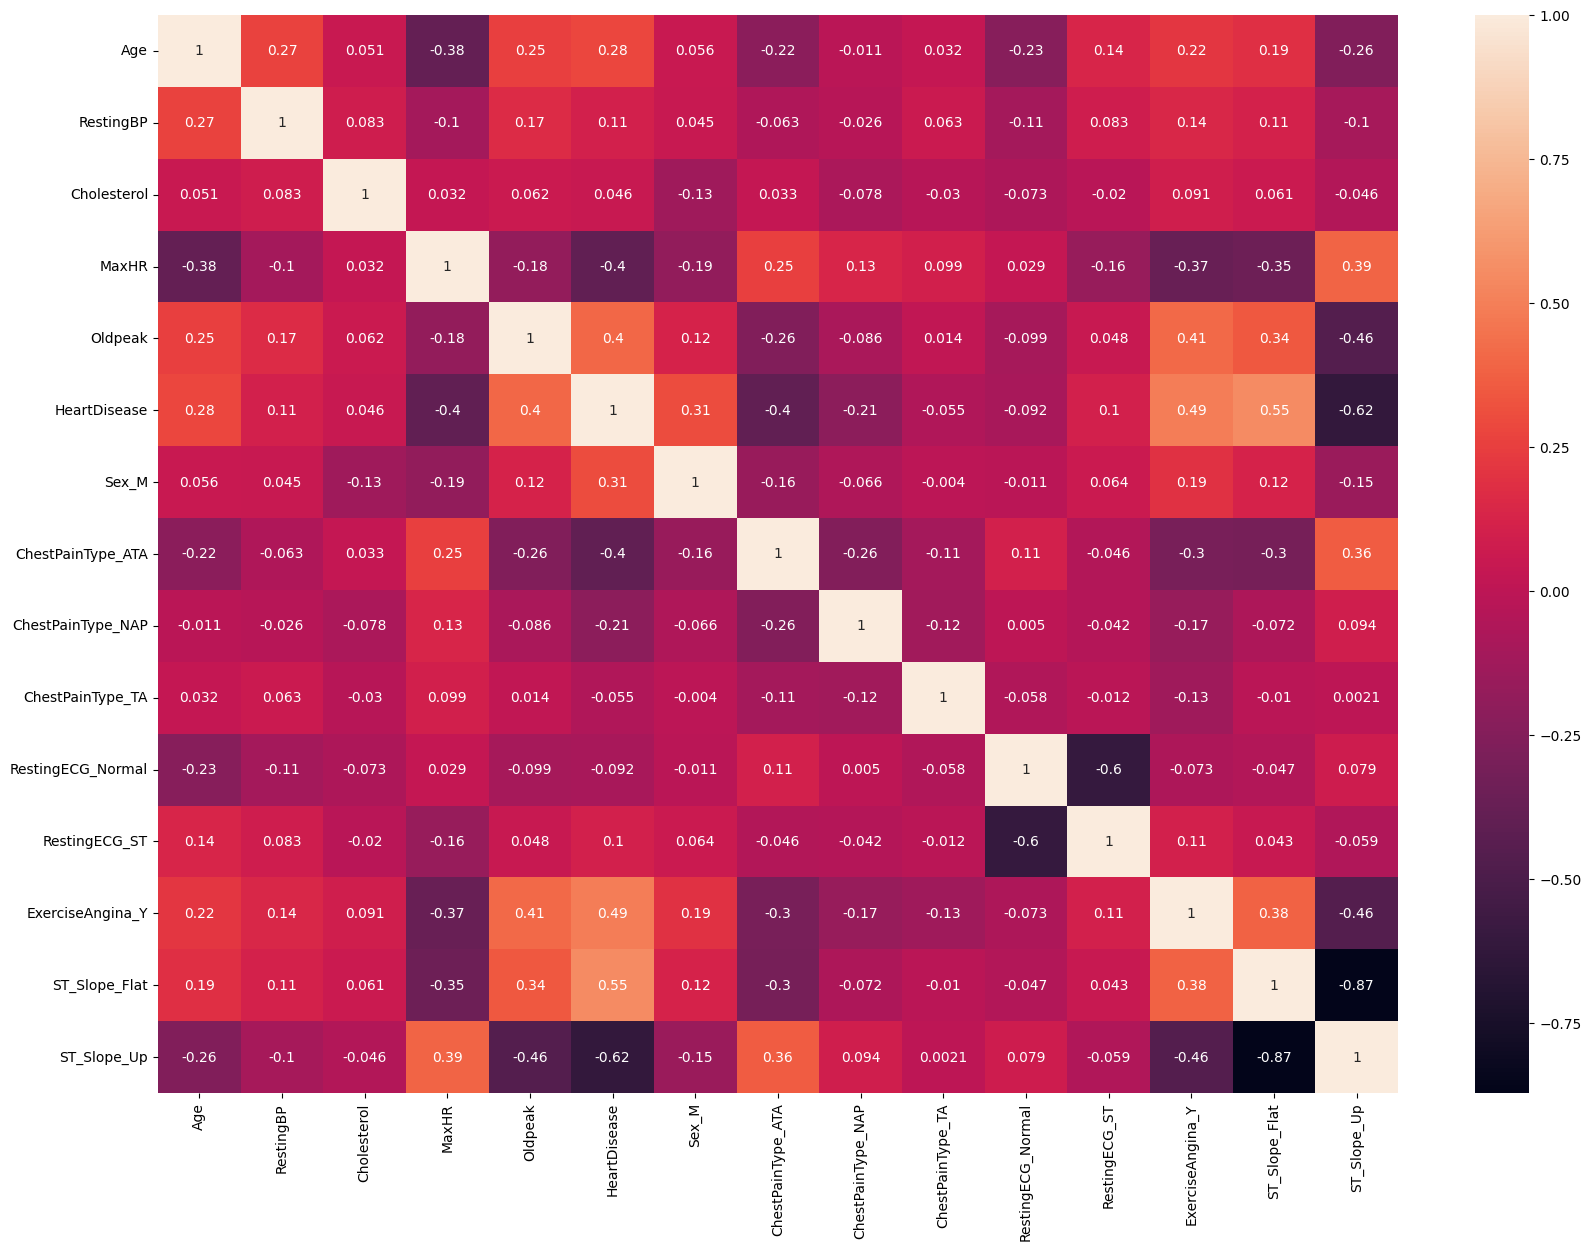

In [22]:
plt.figure(figsize=(20, 14))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [23]:
data = data.drop('ST_Slope_Flat', axis=1)

In [24]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

In [25]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [26]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boos

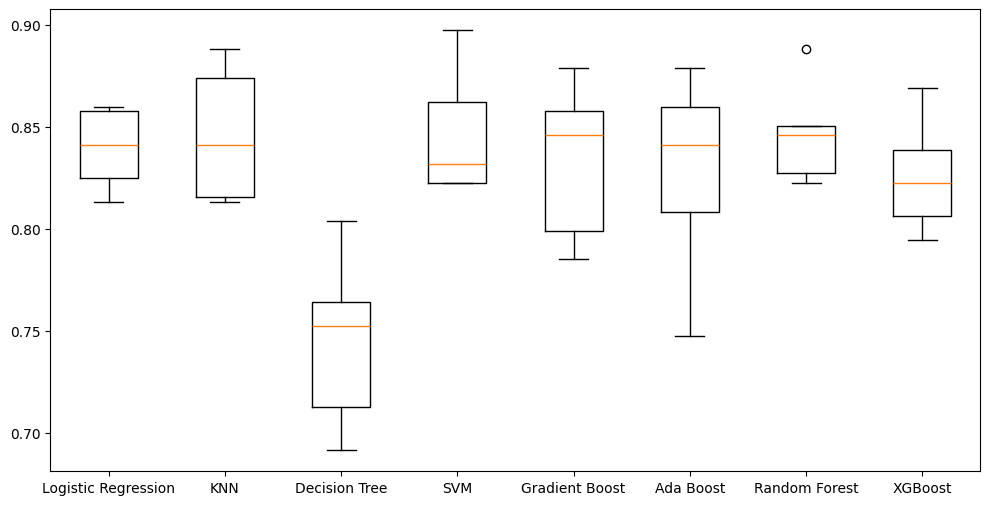

In [ ]:
model = LogisticRegression(max_iter=1000)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(kernel='rbf'),
    "Gradient Boost": GradientBoostingClassifier(),
    "Ada Boost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
}

results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)

plt.figure(figsize=(12, 6))
plt.boxplot(results, labels=models.keys())
plt.show()

In [39]:
for name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"{name}: Train score: {np.round(train_score, 2)} - Test score: {np.round(test_score, 2)}")

Logistic Regression: Train score: 0.85 - Test score: 0.87
KNN: Train score: 0.87 - Test score: 0.83
Decision Tree: Train score: 1.0 - Test score: 0.73
SVM: Train score: 0.89 - Test score: 0.88
Gradient Boost: Train score: 0.93 - Test score: 0.86
Ada Boost: Train score: 0.88 - Test score: 0.88


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Random Forest: Train score: 1.0 - Test score: 0.85
XGBoost: Train score: 1.0 - Test score: 0.83


In [40]:
svm_model = models['SVM']

kf = KFold(n_splits=6, random_state=42, shuffle=True)
cv_results = cross_val_score(svm_model, X_train, y_train, cv=kf)
print(cv_results)

[0.8411215  0.86915888 0.89719626 0.82242991 0.82242991 0.82242991]
